# IEOR 4703 -- Monte Carlo Simulation for FE

### Simulation of a finite state space Markov Chain

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def simulate_markov(num_states, num_steps, flagOn):

    ''' Simulate a Markov chain '''
    # define a random probability transition matrix
    unnormalizedP = np.random.rand(num_states, num_states)

    # a bit of manipulation
    if flagOn == 1:
        unnormalizedP[4, 4] = 35
        #unnormalizedP[num_states-1, num_states-1] = 30

    sum_rows = np.sum(unnormalizedP, axis=1)
    P = (unnormalizedP.T / sum_rows).T # rows should add up to 1

    print('==========================================')
    print('      Transition probability matrix:      ')
    print('------------------------------------------')
    print(np.round(P, 2))
    print(' ')

    # cdf for each state
    cumP = np.cumsum(P, axis=1)
    cumP[:, -1] = 1. # avoid numerical errors

    x = np.zeros(num_steps+1, dtype=int)
    # random initial state, from 0 to num_states-1
    x[0] = int(num_states * np.random.rand())
    print('Iteration 0: initial state %i' % x[0])

    state = np.arange(num_states, dtype=int)
    # chain simulation
    u = np.random.rand(num_steps)
    for k in range(num_steps):

        # current state
        i = x[k]

        # select the corresponding cdf
        p = cumP[i, :]

        # select next state
        j = np.min(state[u[k] <= p])
        x[k + 1] = j

        # print('iter=%i: transitioning from state %i to state %i' % (k+1, i, j))

    return x

In [ ]:
num_states = 6
num_steps = 200
flagOn = 0
chain = simulate_markov(num_states, num_steps, flagOn)

      Transition probability matrix:      
------------------------------------------
[[0.23 0.2  0.01 0.21 0.26 0.09]
 [0.1  0.26 0.19 0.22 0.23 0.  ]
 [0.15 0.03 0.21 0.23 0.23 0.15]
 [0.03 0.25 0.21 0.24 0.26 0.01]
 [0.01 0.13 0.29 0.23 0.28 0.06]
 [0.07 0.38 0.06 0.41 0.03 0.06]]
 
Iteration 0: initial state 4


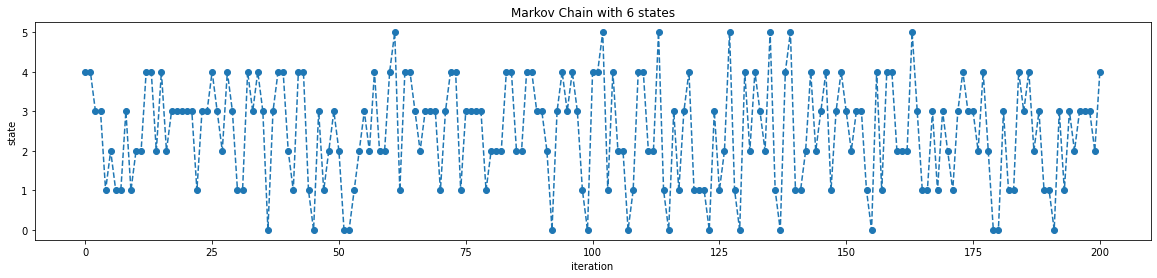

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(np.arange(num_steps+1, dtype=int), chain, 'o--')
plt.xlabel('iteration')
plt.ylabel('state')
plt.title('Markov Chain with %i states' % num_states)
plt.show()